## FNOMCEO

In [1]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/50/ce/a6bc93f7a44dd1fd23698698e369e141f4f24e7098d0a5937808afee3f5e/matplotlib-3.8.3-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/8e/ae/a6353db548bff1a592b85ae6bb80275f0a51dc25a0410d059e5b33183e36/contourpy-1.2.0-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/28/27/42f5cac9f5ee15ab65b3fd939e37a115a0a5e367fcabde5b901599daa85a/fonttools-4.49.0-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/162.3 kB ? eta -:--:--
     ---------------------------- --------- 122.9/162.3 kB 3.6 MB/s e

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Ages distribution

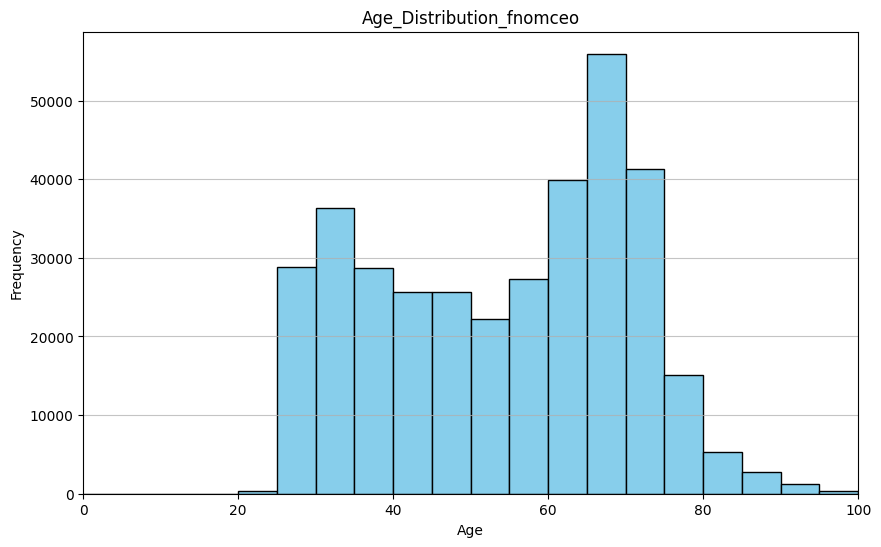

In [2]:
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# Funzione per calcolare l'età a partire dalla data di nascita
def calcola_eta(date_of_birth_str):
    date_of_birth = datetime.strptime(date_of_birth_str, "%d/%m/%Y")
    today = datetime.today()
    return today.year - date_of_birth.year - ((today.month, today.day) < (date_of_birth.month, date_of_birth.day))

# Carica i dati dal file JSON
  # Modifica con il percorso esatto del tuo file
with open('./final_data/fnomceo/fnomceo_final_data.json', 'r') as file:
    data = json.load(file)

# Converti i dati in un DataFrame
df_fnomceo = pd.DataFrame(data)

# Calcola l'età per ogni riga nel DataFrame
df_fnomceo['eta'] = df_fnomceo['date_of_birth'].apply(calcola_eta)

bins = range(0, 101, 5)
# Visualizza un istogramma delle età
plt.figure(figsize=(10, 6))
plt.hist(df_fnomceo['eta'], bins=bins, color='skyblue', edgecolor='black')
plt.title('Age_Distribution_fnomceo')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.xlim(0, 100)
plt.show()






### Descriptive_analysis_fnomceo

In [3]:
df_fnomceo['eta'] = df_fnomceo['date_of_birth'].apply(calcola_eta)

# Calcola statistiche descrittive per l'età
desc_stats = df_fnomceo['eta'].describe()

# Calcola la simmetria per l'età
skewness = df_fnomceo['eta'].skew()

# Aggiungi la simmetria al DataFrame delle statistiche descrittive
desc_stats['skewness'] = skewness

# Visualizza le statistiche
print(desc_stats)

count       357084.000000
mean            53.758320
std             16.579119
min             23.000000
25%             39.000000
50%             57.000000
75%             67.000000
max           1845.000000
skewness         3.401799
Name: eta, dtype: float64


In [4]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   -------------------- ------------------- 153.6/294.9 kB 2.3 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import seaborn as sns
# Display the first few rows of the DataFrame to get a sense of the data
print(df_fnomceo.head())

# Display general information about the DataFrame, such as the number of non-null values and data type for each column
print(df_fnomceo.info())

# Calculate descriptive statistics for numeric columns
print(df_fnomceo.describe())

# Display the number of missing values for each column
print(df_fnomceo.isnull().sum())

# Convert date strings to datetime objects
df_fnomceo['last_update_date'] = pd.to_datetime(df_fnomceo['last_update_date'], format='%d/%m/%Y')

# Find the minimum value of the last update date
min_date = df_fnomceo['last_update_date'].min()

# Find the maximum value of the last update date
max_date = df_fnomceo['last_update_date'].max()

print(f"Minimum Last Update Date: {min_date}")
print(f"Maximum Last Update Date: {max_date}")



  person_id  surname               first_name date_of_birth  \
0    399366  BADESSA                  ANTONIO    06/07/1946   
1     33538  BADESSA                FRANCESCO    01/01/1967   
2    325585  BADESSI                FRANCESCA    03/07/1981   
3    343163  BADESSI  FRANCESCO GIUSEPPE ALDO    18/12/1947   
4    554984  BADESSI                  GIORGIO    28/12/1991   

                    birth_place             province  \
0  SANT'AGATA DI MILITELLO (ME)   FORLI'-CESENA (FC)   
1                  MESSINA (ME)         MESSINA (ME)   
2                  ALGHERO (SS)         SASSARI (SS)   
3                  ARBOREA (OR)         SASSARI (SS)   
4              PAESI BASSI (EE)            ROMA (RM)   

                               full_name    prefix  \
0                  DOTT. BADESSA ANTONIO     DOTT.   
1                DOTT. BADESSA FRANCESCO     DOTT.   
2             Dott.ssa BADESSI FRANCESCA  Dott.ssa   
3  Dott. BADESSI FRANCESCO GIUSEPPE ALDO     Dott.   
4             

## FNOFI

#### Ages distribution

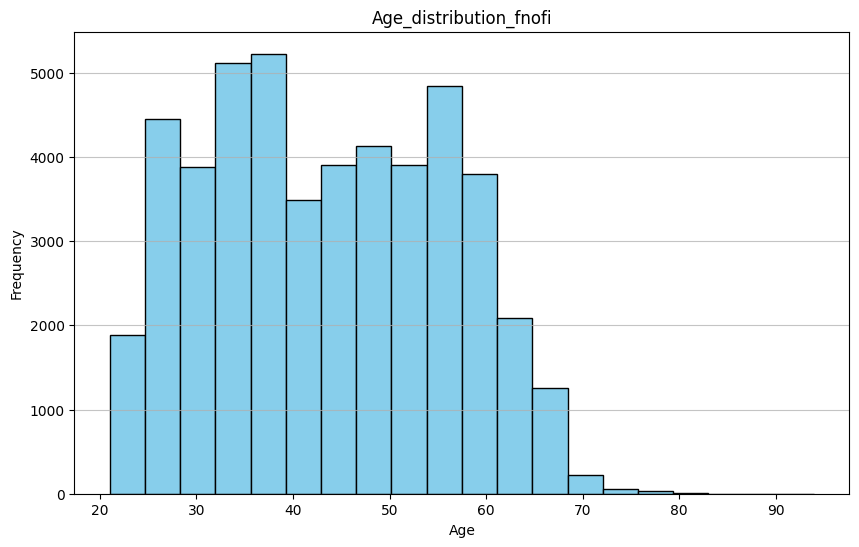

In [6]:
#define the function to calculate ages
import json
from datetime import datetime
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
#define the function to calculate ages

with open('./final_data/fnofi/fnofi_final_data.json', 'r') as file:
    dati = json.load(file)

def calculate_age(date_of_birth):
    today = datetime.today()
    birth_date = datetime.strptime(date_of_birth, "%Y-%m-%dT%H:%M:%S.%fZ")
   
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age
df_fnofi = pd.DataFrame(dati)
# Apply the function and create a new label "eta"
df_fnofi['eta'] = df_fnofi['date_of_birth'].apply(calculate_age)

plt.figure(figsize=(10, 6))
plt.hist(df_fnofi['eta'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age_distribution_fnofi')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()






### Descriptive_analysis_fnofi

In [7]:
df_fnofi['eta'] = df_fnofi['date_of_birth'].apply(calculate_age)

# Calcola statistiche descrittive per l'età
desc_stats = df_fnofi['eta'].describe()

# Calcola la simmetria per l'età
skewness = df_fnofi['eta'].skew()

# Aggiungi la simmetria al DataFrame delle statistiche descrittive
desc_stats['skewness'] = skewness

# Visualizza le statistiche
print(desc_stats)

count       48313.000000
mean           43.443814
std            12.263470
min            21.000000
25%            33.000000
50%            43.000000
75%            54.000000
max            94.000000
skewness        0.141623
Name: eta, dtype: float64


## Alboweb

#### Ages distribution

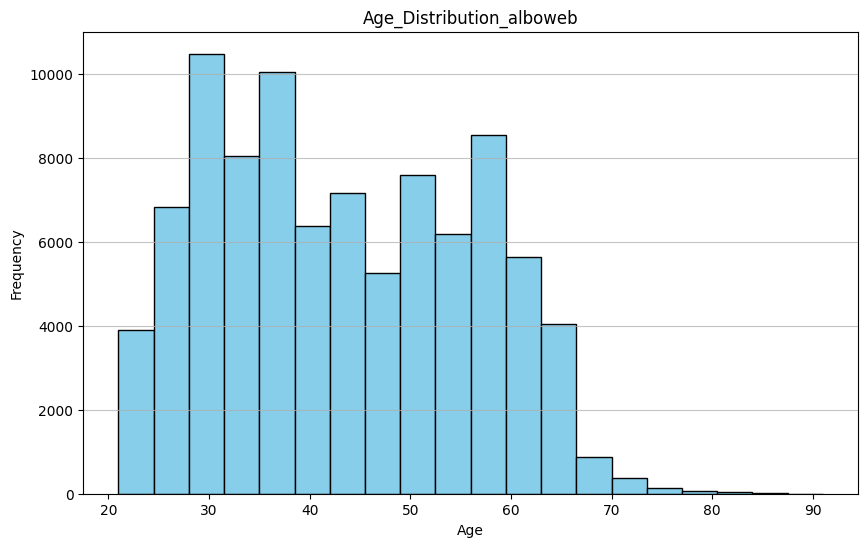

In [8]:
import json
from datetime import datetime
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

#define the function to calculate ages

with open('./final_data/alboweb/alboweb_final_data.json', 'r') as file:
    dati = json.load(file)

def calculate_ages(date_of_birth):
    today = datetime.today()
    birth_date = datetime.strptime(date_of_birth, "%Y-%m-%dT%H:%M:%S.%f%z")
   
    age = today.year - birth_date.year - ((today.month, today.day) < (birth_date.month, birth_date.day))
    return age
df_alboweb = pd.DataFrame(dati)
# Apply the function and create a new label "eta"
df_alboweb['eta'] = df_alboweb['date_of_birth'].apply(calculate_age)

plt.figure(figsize=(10, 6))
plt.hist(df_alboweb['eta'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age_Distribution_alboweb')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()


### Descriptive_analysis_alboweb

In [9]:
df_alboweb['eta'] = df_alboweb['date_of_birth'].apply(calculate_ages)

# Calcola statistiche descrittive per l'età
desc_stats = df_alboweb['eta'].describe()

# Calcola la simmetria per l'età
skewness = df_alboweb['eta'].skew()

# Aggiungi la simmetria al DataFrame delle statistiche descrittive
desc_stats['skewness'] = skewness

# Visualizza le statistiche
print(desc_stats)

count       91559.000000
mean           43.024421
std            12.622478
min            21.000000
25%            32.000000
50%            42.000000
75%            54.000000
max            91.000000
skewness        0.221820
Name: eta, dtype: float64


In [10]:
df_fnomceo.describe()

,last_update_date,eta
count,357069,357084.000000
mean,2024-01-27 09:20:05.766952192,53.758320
min,2013-04-19 00:00:00,23.000000
25%,2024-01-22 00:00:00,39.000000
50%,2024-01-31 00:00:00,57.000000
75%,2024-02-06 00:00:00,67.000000
max,2024-02-14 00:00:00,1845.000000
std,NaN,16.579119


In [11]:
df_alboweb.describe()

,person_id,eta
count,9.155900e+04,91559.000000
mean,1.490752e+08,43.024421
std,5.250205e+08,12.622478
min,1.400000e+02,21.000000
25%,7.756750e+04,32.000000
50%,1.472480e+05,42.000000
75%,2.204750e+05,54.000000
max,2.000028e+09,91.000000


In [12]:
df_fnofi.describe()

,person_id,eta
count,4.831300e+04,48313.000000
mean,1.376712e+08,43.443814
std,5.061499e+08,12.263470
min,3.414000e+03,21.000000
25%,1.021090e+05,33.000000
50%,1.503560e+05,43.000000
75%,2.018370e+05,54.000000
max,2.001008e+09,94.000000


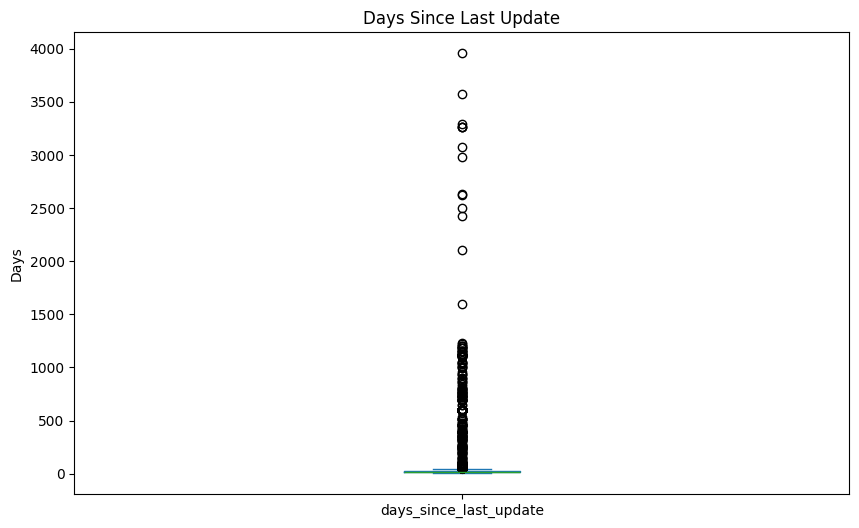

In [13]:
# Converti 'last_update_date' in datetime
df_fnomceo['last_update_date'] = pd.to_datetime(df_fnomceo['last_update_date'], format='%d/%m/%Y')

# Calcola la differenza in giorni dalla data di ultimo aggiornamento a oggi
df_fnomceo['days_since_last_update'] = (pd.Timestamp.now() - df_fnomceo['last_update_date']).dt.days

# Crea un box plot dei giorni trascorsi dall'ultimo aggiornamento
plt.figure(figsize=(10, 6))
df_fnomceo['days_since_last_update'].plot(kind='box')
plt.title('Days Since Last Update')
plt.ylabel('Days')
plt.show()